<a href="https://colab.research.google.com/github/19PA1A0496/10-03-2020/blob/master/MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [17]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)

(60000, 28, 28, 1)


In [18]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [19]:
print(y_train.shape)
print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [20]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(y_train.shape)
print(y_train)

(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [21]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [22]:
model.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [29]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0027 - accuracy: 0.9824
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0018 - accuracy: 0.9888
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0014 - accuracy: 0.9914
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0010 - accuracy: 0.9937
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 8.9390e-04 - accuracy: 0.9945


3


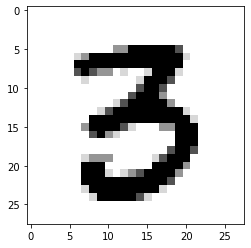

In [39]:
image_index = 5555
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [37]:
scores=model.evaluate(x_test,y_test)
print('Accuracy:', scores[1]*1000)

313/313 [==============================] - 2s 6ms/step - loss: 27.3389 - accuracy: 0.0985
Accuracy: 98.49999845027924
